In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(leukwbc)

In [3]:
str(leukwbc)

'data.frame':	33 obs. of  3 variables:
 $ WBC : int  2300 750 4300 2600 6000 10500 10000 17000 5400 7000 ...
 $ Time: int  65 156 100 134 16 108 121 4 39 143 ...
 $ AG  : int  1 1 1 1 1 1 1 1 1 1 ...


In [5]:
leukwbc

WBC,Time,AG
2300,65,1
750,156,1
4300,100,1
2600,134,1
6000,16,1
10500,108,1
10000,121,1
17000,4,1
5400,39,1
7000,143,1


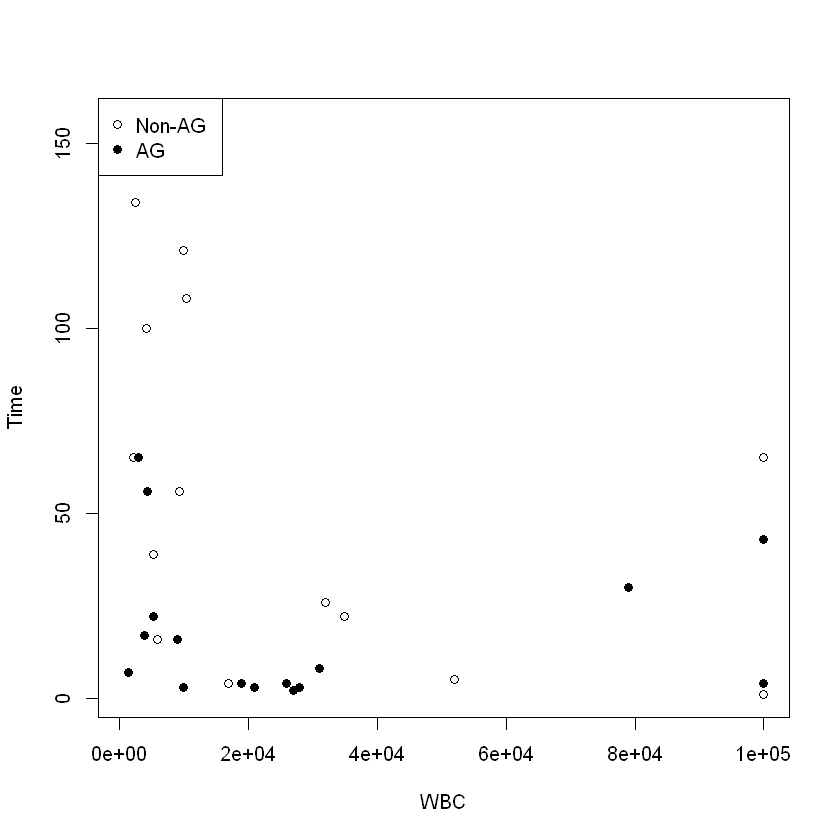

In [6]:
plot(Time ~ WBC, data=leukwbc, pch=ifelse(AG==1, 1, 19))
legend("topleft", pch=c(1, 19), legend=c("Non-AG", "AG"))

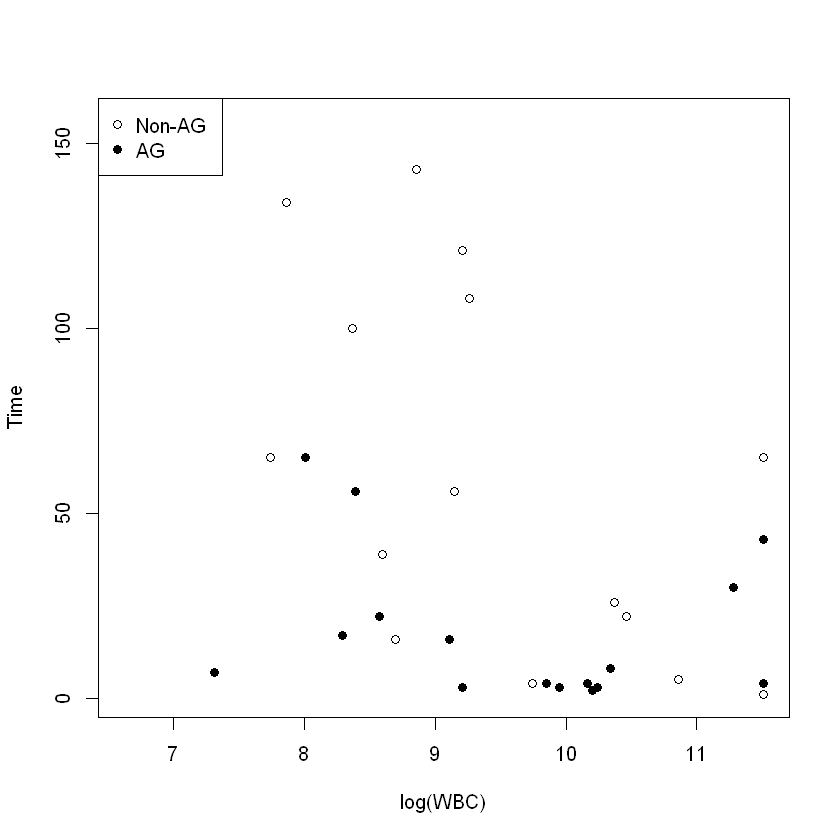

In [7]:
plot(Time ~ log(WBC), data=leukwbc, pch=ifelse(AG==1, 1, 19))
legend("topleft", pch=c(1, 19), legend=c("Non-AG", "AG"))

In [8]:
glm.1 <- glm(Time ~ log(WBC)*factor(AG), data=leukwbc, family = Gamma(link="log"))

In [9]:
coef(summary(glm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),8.4782094,1.7489712,4.847541,3.874859e-05
log(WBC),-0.4818293,0.1834436,-2.626581,1.363297e-02
factor(AG)2,-4.1346744,2.7154878,-1.522627,1.386832e-01
log(WBC):factor(AG)2,0.3277839,0.2819652,1.162498,2.545109e-01


In [10]:
anova(glm.1, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,32,58.13839,NA,NA
log(WBC),1,10.329987,31,47.80840,9.254829,0.004948502
factor(AG),1,7.489309,30,40.31909,6.709813,0.014848033
log(WBC):factor(AG),1,1.764485,29,38.55460,1.580835,0.218672151


In [11]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1) # Kiểm tra điều kiện xấp xỉ yên ngựa
gof.pearson / df.residual(glm.1)

[1] 0.1104909

[1] 0.3039119

[1] 1.329469

[1] 1.116173

In [12]:
glm.2 <- glm(Time ~ log(WBC)+factor(AG), data=leukwbc, family = Gamma(link="log"))

In [13]:
coef(summary(glm.2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),6.8330561,1.3214662,5.170814,1.438068e-05
log(WBC),-0.3044004,0.1375251,-2.213418,3.461695e-02
factor(AG)2,-1.0176452,0.3642168,-2.794065,8.982491e-03


In [14]:
anova(glm.2, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,32,58.13839,NA,NA
log(WBC),1,10.329987,31,47.80840,9.496964,0.004383779
factor(AG),1,7.489309,30,40.31909,6.885362,0.013534536



	Shapiro-Wilk normality test

data:  qr3
W = 0.96664, p-value = 0.3934


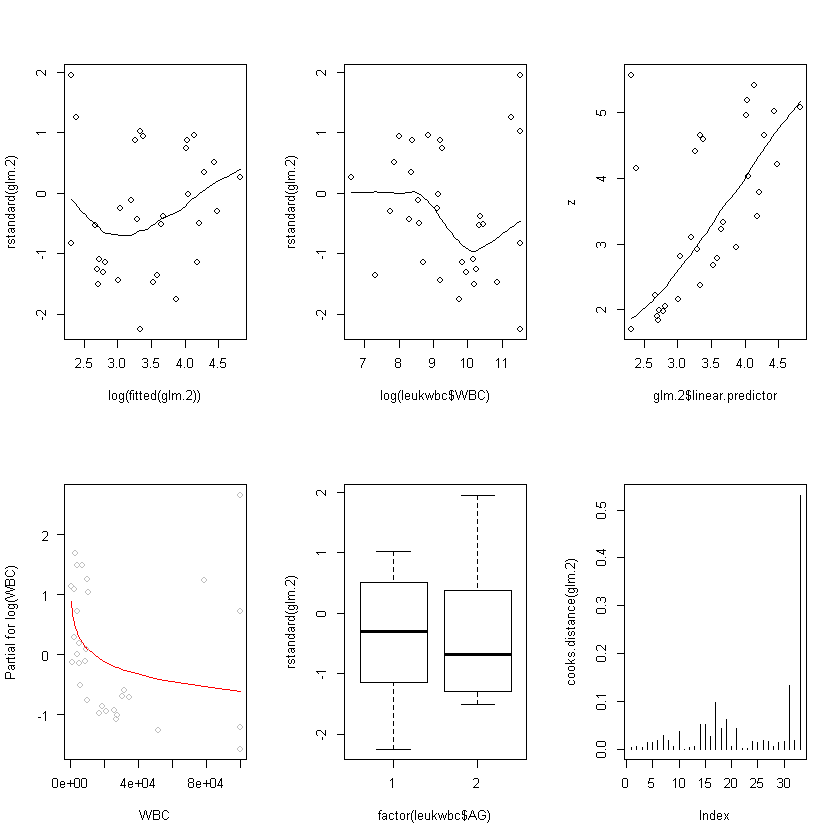

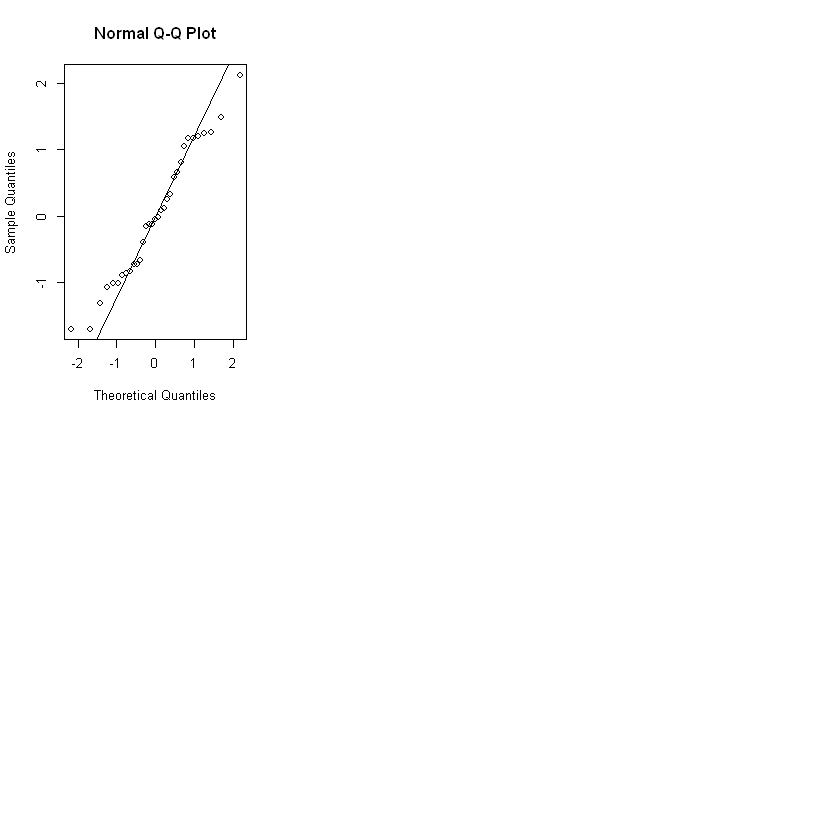

In [15]:
par(mfrow=c(2, 3))

scatter.smooth(rstandard(glm.2) ~ log(fitted(glm.2)))
z <- glm.2$linear.predictor + resid(glm.2, type="working")
scatter.smooth(rstandard(glm.2) ~ log(leukwbc$WBC))
scatter.smooth(z ~ glm.2$linear.predictor)
termplot(glm.2, partial.resid = TRUE, las=1, terms="log(WBC)")
plot(rstandard(glm.2) ~ factor(leukwbc$AG))
plot(cooks.distance(glm.2), type="h")
qqnorm(qr3 <- qresid(glm.2))
qqline(qr3)
shapiro.test(qr3)

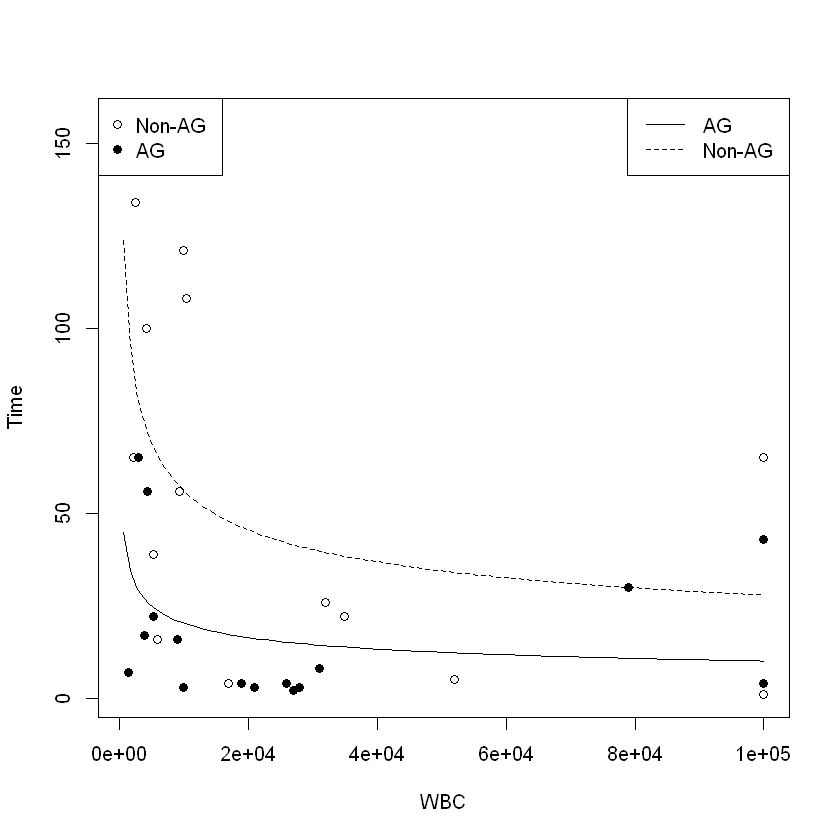

In [18]:
newWBC <- seq(min(leukwbc$WBC), max(leukwbc$WBC), length=100)
fit.ag <- predict(glm.2, newdata=data.frame(WBC=newWBC, AG=2), type="response")
fit.non.ag <- predict(glm.2, newdata=data.frame(WBC=newWBC, AG=1), type="response")

plot(Time ~ WBC, data=leukwbc, pch=ifelse(AG==1, 1, 19))
legend("topleft", pch=c(1, 19), legend=c("Non-AG", "AG"))
lines(fit.ag ~ newWBC, lty=1)
lines(fit.non.ag ~ newWBC, lty=2)
legend("topright", lty=c(1, 2), legend=c("AG", "Non-AG"))

In [19]:
phi.md <- gof.dev / df.residual(glm.1)
phi.pearson <- gof.pearson / df.residual(glm.1)
#Gần bằng 1 nên hợp lý khi xem là phân phối mũ
phi.md; phi.pearson

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 1.329469

[1] 1.116173